# Установки

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from google.colab import files

Mounted at /content/drive


In [ ]:
!pip install --upgrade geopandas
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 16.7 MB 55.1 MB/s 
     |████████████████████████████████| 6.3 MB 18.7 MB/s 


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
from shapely.geometry import Point

In [ ]:
mainDirectory = "/content/drive/My Drive/Resection/Analysis/"
dotsJson = mainDirectory + "dots.geojson"
dots =  gpd.read_file(dotsJson)
polygonsJson = mainDirectory + "Bibirevo_Zelao.geojson"
polygons =  gpd.read_file(polygonsJson)
polygonsJsonAll = mainDirectory + "polygons.geojson"
polygonsAll =  gpd.read_file(polygonsJsonAll)
lenDots = len(dots)
lenPolygons = len(polygons)
lenPolygonsAll = len(polygonsAll)

# Визуализация ошибок

In [ ]:
polysCheck = []

for _ in range(lenPolygonsAll):
  if "POLYGON" not in str(polygonsAll["geometry"][_]):
    polysCheck.append(1)

print("Некорректных записей геометрии: ", len(polysCheck))

Некорректных записей геометрии:  0


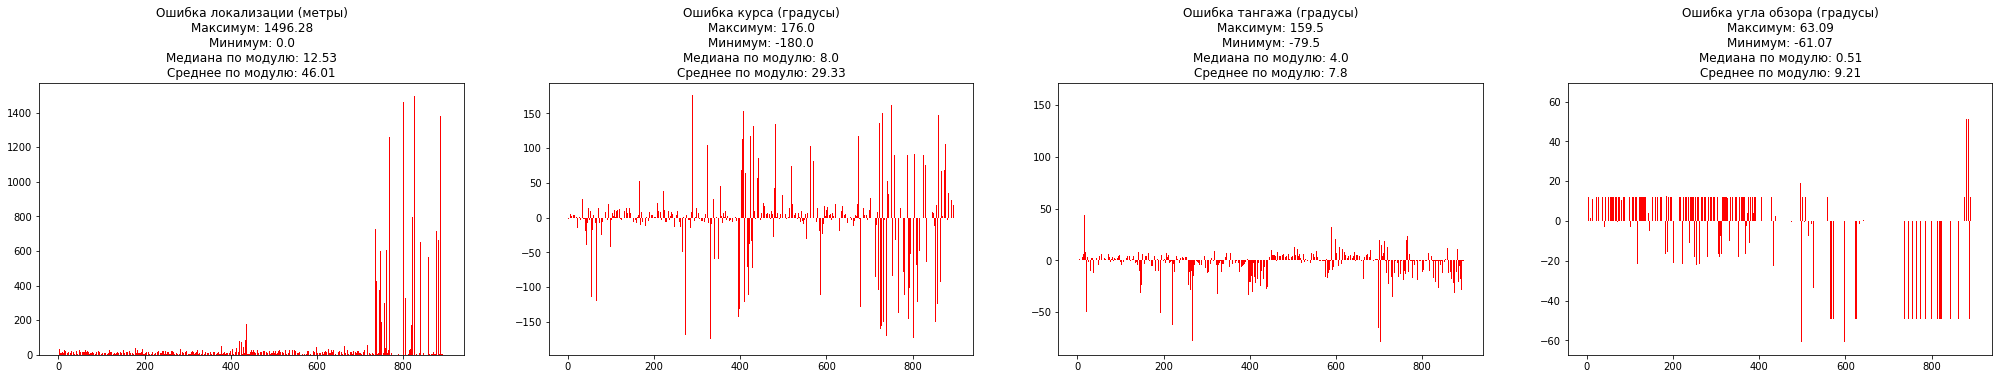

In [ ]:
names = ["Ошибка локализации (метры)", "Ошибка курса (градусы)", "Ошибка тангажа (градусы)", "Ошибка угла обзора (градусы)"]
intArray = np.arange(1, lenDots + 1, 1, dtype=int)
num = 2

valuesCoordinatesError = dots["distanceError"]
valuesHeadingError = dots["headingError"]
valuesPitchError = dots["pitchError"]
valuesFovError = dots["fovError"]

valuesAll = [valuesCoordinatesError, valuesHeadingError, valuesPitchError, valuesFovError]

meta = []
metabs = []
for _ in range(len(valuesAll)):
  max = np.max(valuesAll[_])
  min = np.min(valuesAll[_])
  mean = np.mean(np.absolute(valuesAll[_]))
  median = np.median(np.absolute(valuesAll[_]))
  meta.append([max, min, median, mean])
  maxabsolute = np.max(np.absolute(valuesAll[_]))
  metabs.append(maxabsolute)

image_count = len(names)
fig, axs = plt.subplots(1, image_count, figsize=(35, 5))
for i in range(image_count):
  #axs[i].axis('off')
  axs[i].bar(intArray, valuesAll[i], color='r')
  t = names[i] + '\n' + "Максимум: " + str(round(meta[i][0], num)) + '\n' + "Минимум: " + str(round(meta[i][1], num)) + '\n' + "Медиана по модулю: " + str(round(meta[i][2], num)) + '\n' + "Среднее по модулю: " + str(round(meta[i][3], num))
  title = axs[i].title.set_text(t)

In [ ]:
valuesCoordinatesErrorNormalized = np.absolute(valuesCoordinatesError) / metabs[0]
valuesHeadingErrorNormalized = np.absolute(valuesHeadingError) / metabs[1]
valuesPitchErrorNormalized = np.absolute(valuesPitchError) / metabs[2]
valuesFovErrorNormalized = np.absolute(valuesFovError) / metabs[3]

valuesErrorNormalized = [valuesCoordinatesErrorNormalized, valuesHeadingErrorNormalized, valuesPitchErrorNormalized, valuesFovErrorNormalized]

cmin = 0.1
cmax = 1.0
def pltcolor(array, min, max):
    cols = []
    for i in array:
      min = 0.1
      max = 1.0
      deltamaxmin = min + ((max - min) * i)
      cols.append([1, 1-deltamaxmin, 1-deltamaxmin])
    return cols

fig, axs = plt.subplots(image_count, 1, figsize=(30,30))
geometry = polygons["geometry"]
for i in range(image_count):

  cols = pltcolor(valuesErrorNormalized[i], cmin, cmax)
  geometry.plot(color=[0.98, 0.98, 0.98], ax=axs[i], edgecolor='gray')
  dots.plot(markersize=3, color=cols, ax=axs[i])
  title = axs[i].title.set_text(names[i])

  nValues = np.arange(0, metabs[i])
  xValues = np.linspace(0, 10)
  dataset = [(xValues-5-0.5*n)**2 for n in nValues]
  normalize = mcolors.Normalize(vmin=nValues.min(), vmax=nValues.max())
  colors  = [(1, 1-hue, 1-hue) for hue in np.linspace(cmin, cmax, 100)]
  colormap = matplotlib.colors.ListedColormap(colors, name='from_list', N=None)
  scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
  scalarmappaple.set_array(nValues)
  plt.colorbar(scalarmappaple, ax=axs[i])

plt.show()